<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/EDA_Univariate_vs_Bivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Prices: Exploratory Data Analysis

## Univariate EDA

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Importing and preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_DIR = '/content/drive/MyDrive/_Python/Predictive-Analytics-with-Python-Hands-On/Data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
## Preparation done from Chapter 2
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,1,0,0,0,0


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53930 non-null  float64
 1   cut            53930 non-null  object 
 2   color          53930 non-null  object 
 3   clarity        53930 non-null  object 
 4   depth          53930 non-null  float64
 5   table          53930 non-null  float64
 6   price          53930 non-null  int64  
 7   x              53930 non-null  float64
 8   y              53930 non-null  float64
 9   z              53930 non-null  float64
 10  cut_Good       53930 non-null  uint8  
 11  cut_Ideal      53930 non-null  uint8  
 12  cut_Premium    53930 non-null  uint8  
 13  cut_Very Good  53930 non-null  uint8  
 14  color_E        53930 non-null  uint8  
 15  color_F        53930 non-null  uint8  
 16  color_G        53930 non-null  uint8  
 17  color_H        53930 non-null  uint8  
 18  color_

In [6]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [7]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(diamonds[feature_name].describe().round(2).astype(str)), size=17)

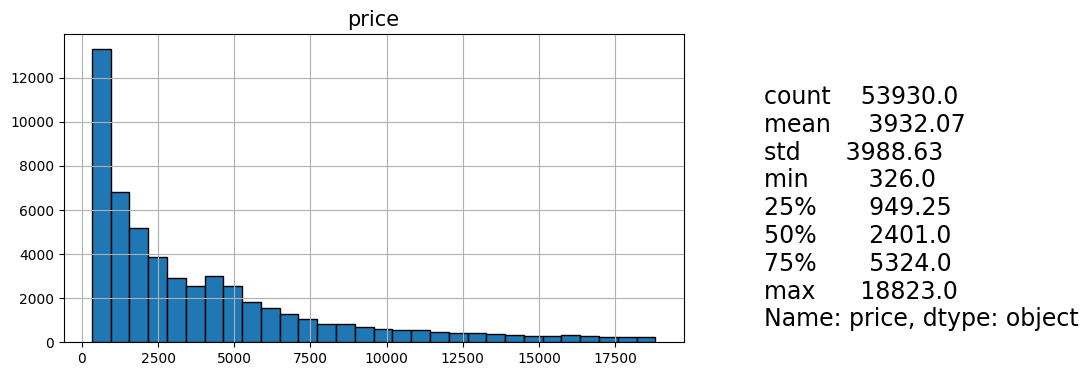

In [8]:
desc_num_feature('price')

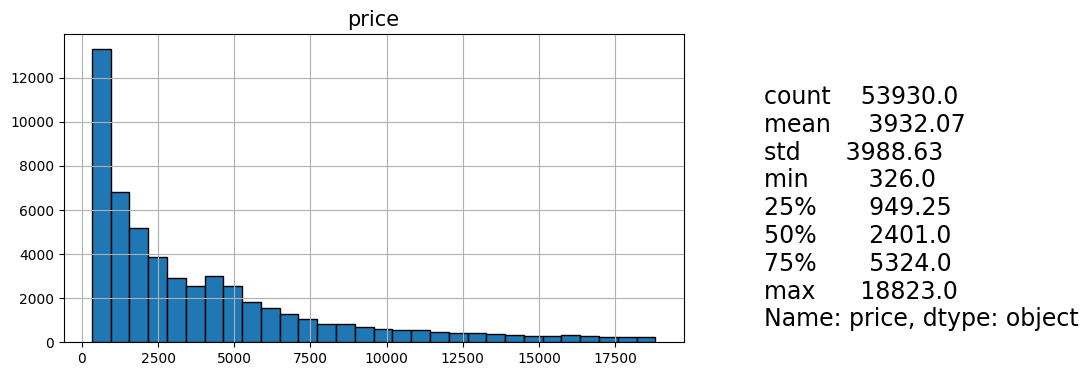

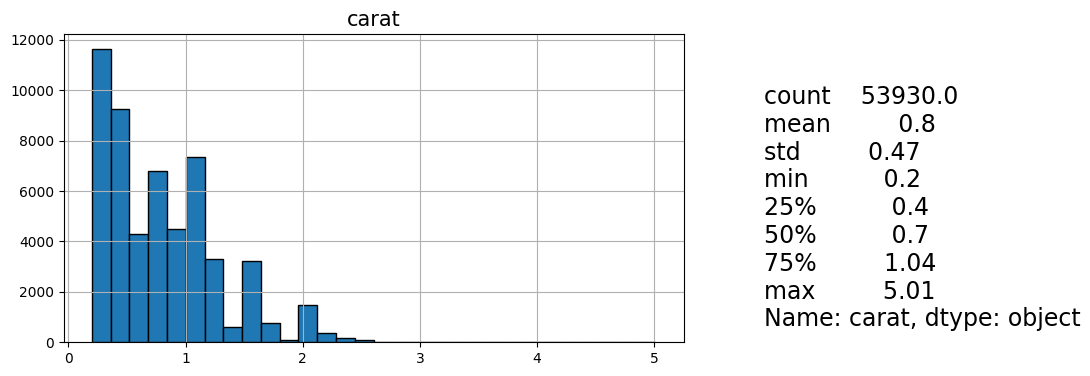

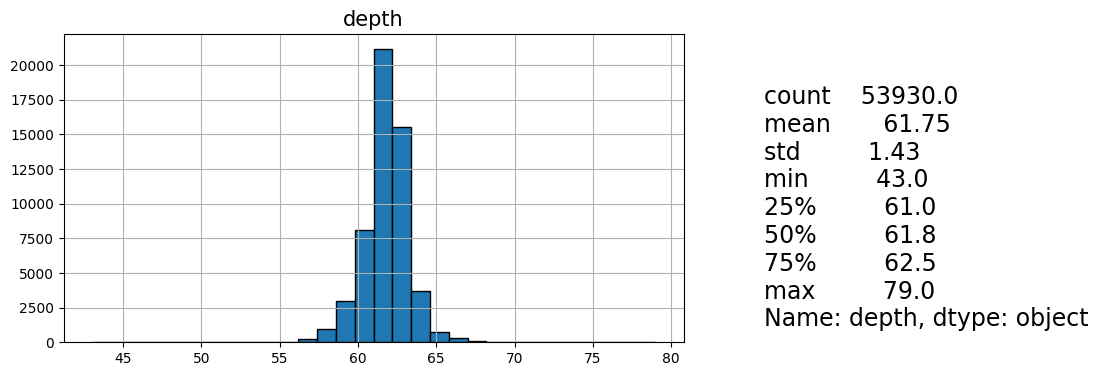

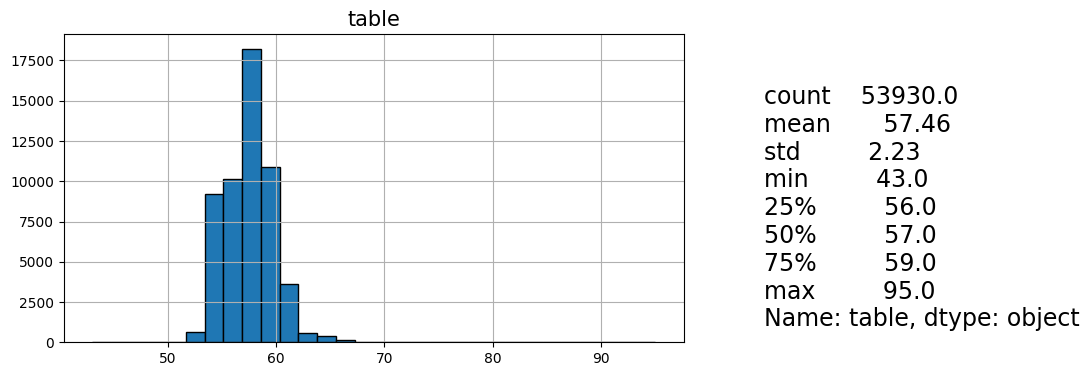

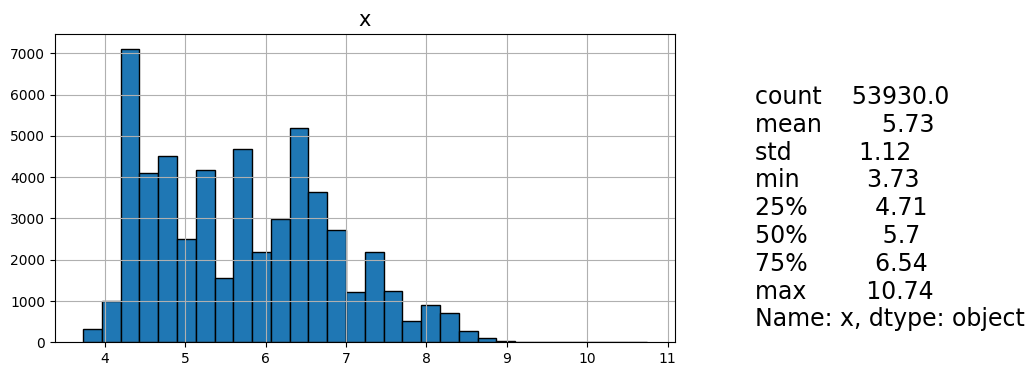

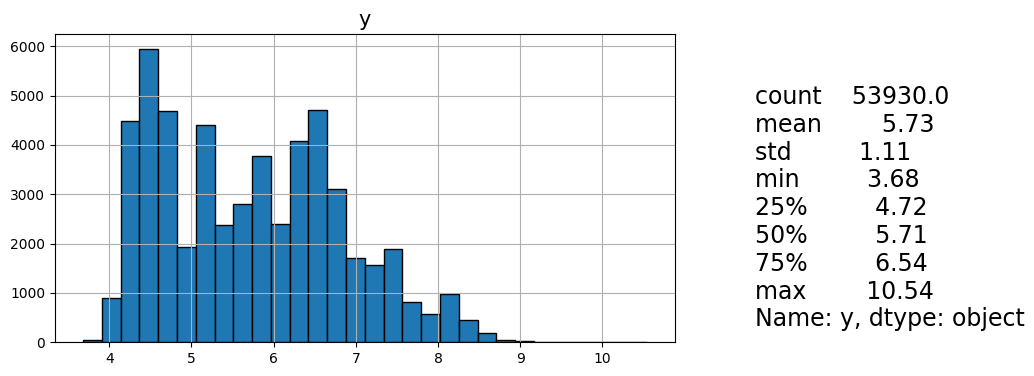

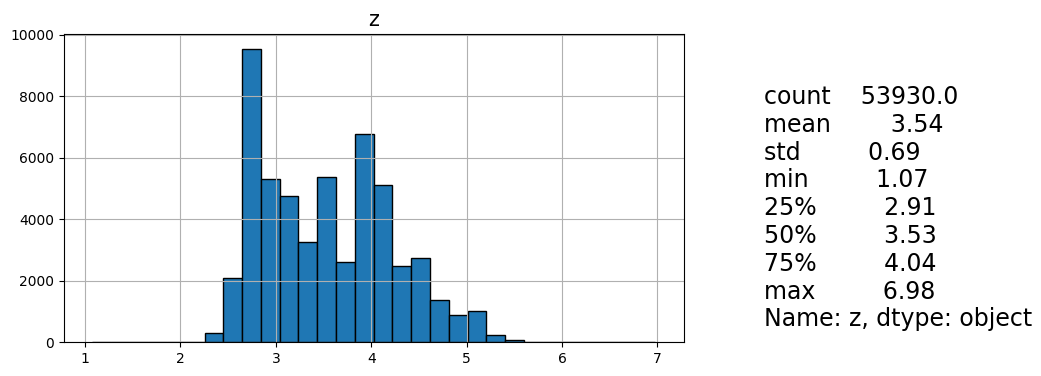

In [9]:
for x in numerical_features:
    desc_num_feature(x)

### Univariate EDA for categorical features

           count  percent
Ideal      21549     40.0
Premium    13788     25.6
Very Good  12080     22.4
Good        4904      9.1
Fair        1609      3.0


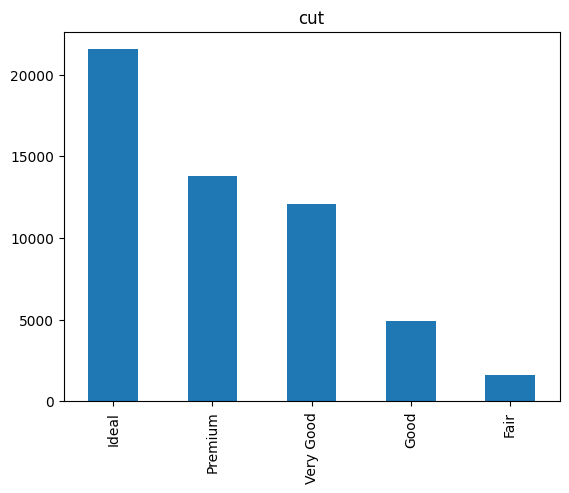

In [10]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   count  percent
G  11290     20.9
E   9795     18.2
F   9540     17.7
H   8301     15.4
D   6774     12.6
I   5422     10.1
J   2808      5.2


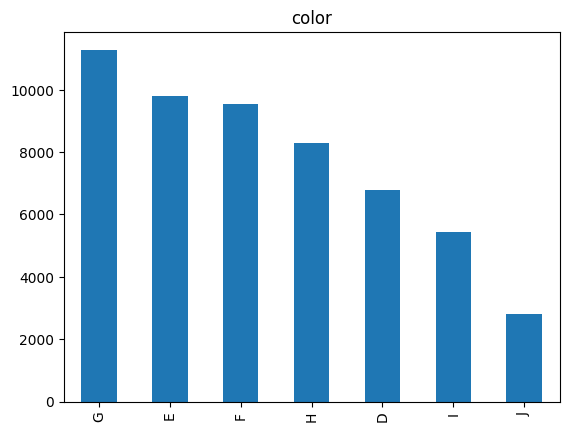

In [11]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      count  percent
SI1   13065     24.2
VS2   12256     22.7
SI2    9190     17.0
VS1    8168     15.1
VVS2   5066      9.4
VVS1   3654      6.8
IF     1790      3.3
I1      741      1.4


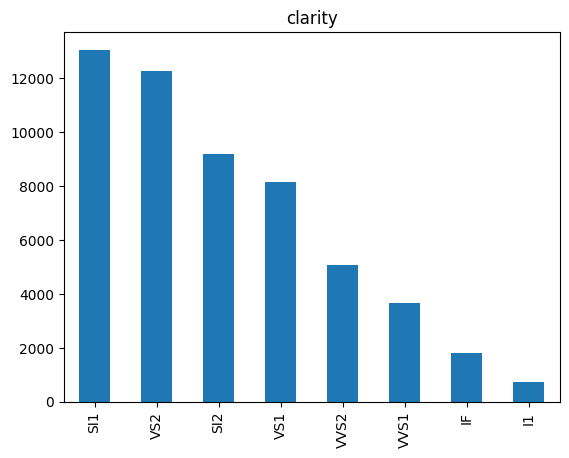

In [12]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [13]:
def desc_cat_feature(feature_name, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, diamonds[feature_name].describe().round(2), size=17)

## Bivariate EDA

### Two numerical features

#### The scatter plot

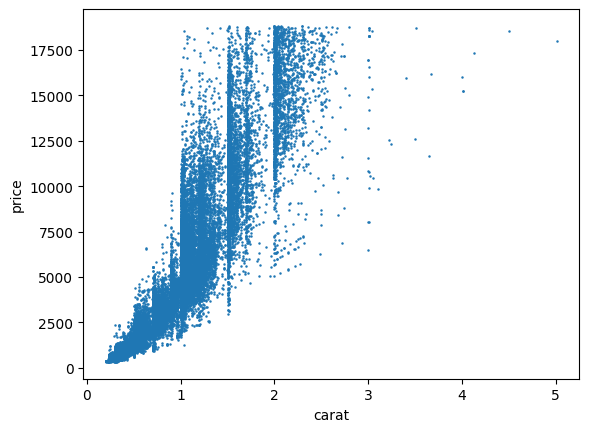

In [14]:
diamonds.plot.scatter(x='carat', y='price', s=0.6);

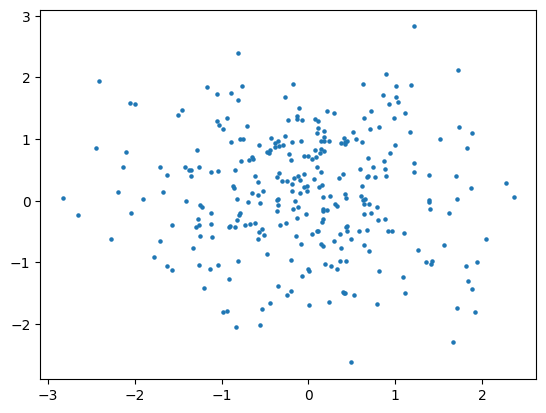

In [15]:
r1 = np.random.normal(size=300)
r2 = np.random.normal(size=300)
plt.scatter(r1, r2, s=5);

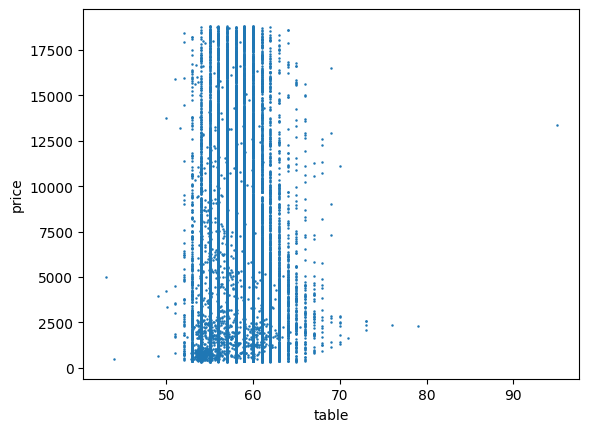

In [16]:
diamonds.plot.scatter(x='table', y='price', s=0.6);

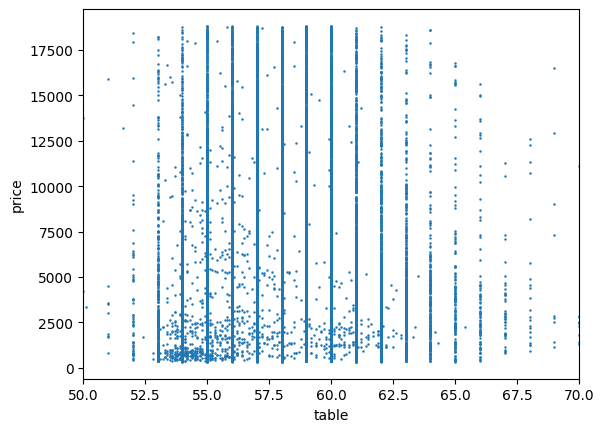

In [17]:
diamonds.plot.scatter(x='table', y='price', s=0.6, xlim=(50,70));

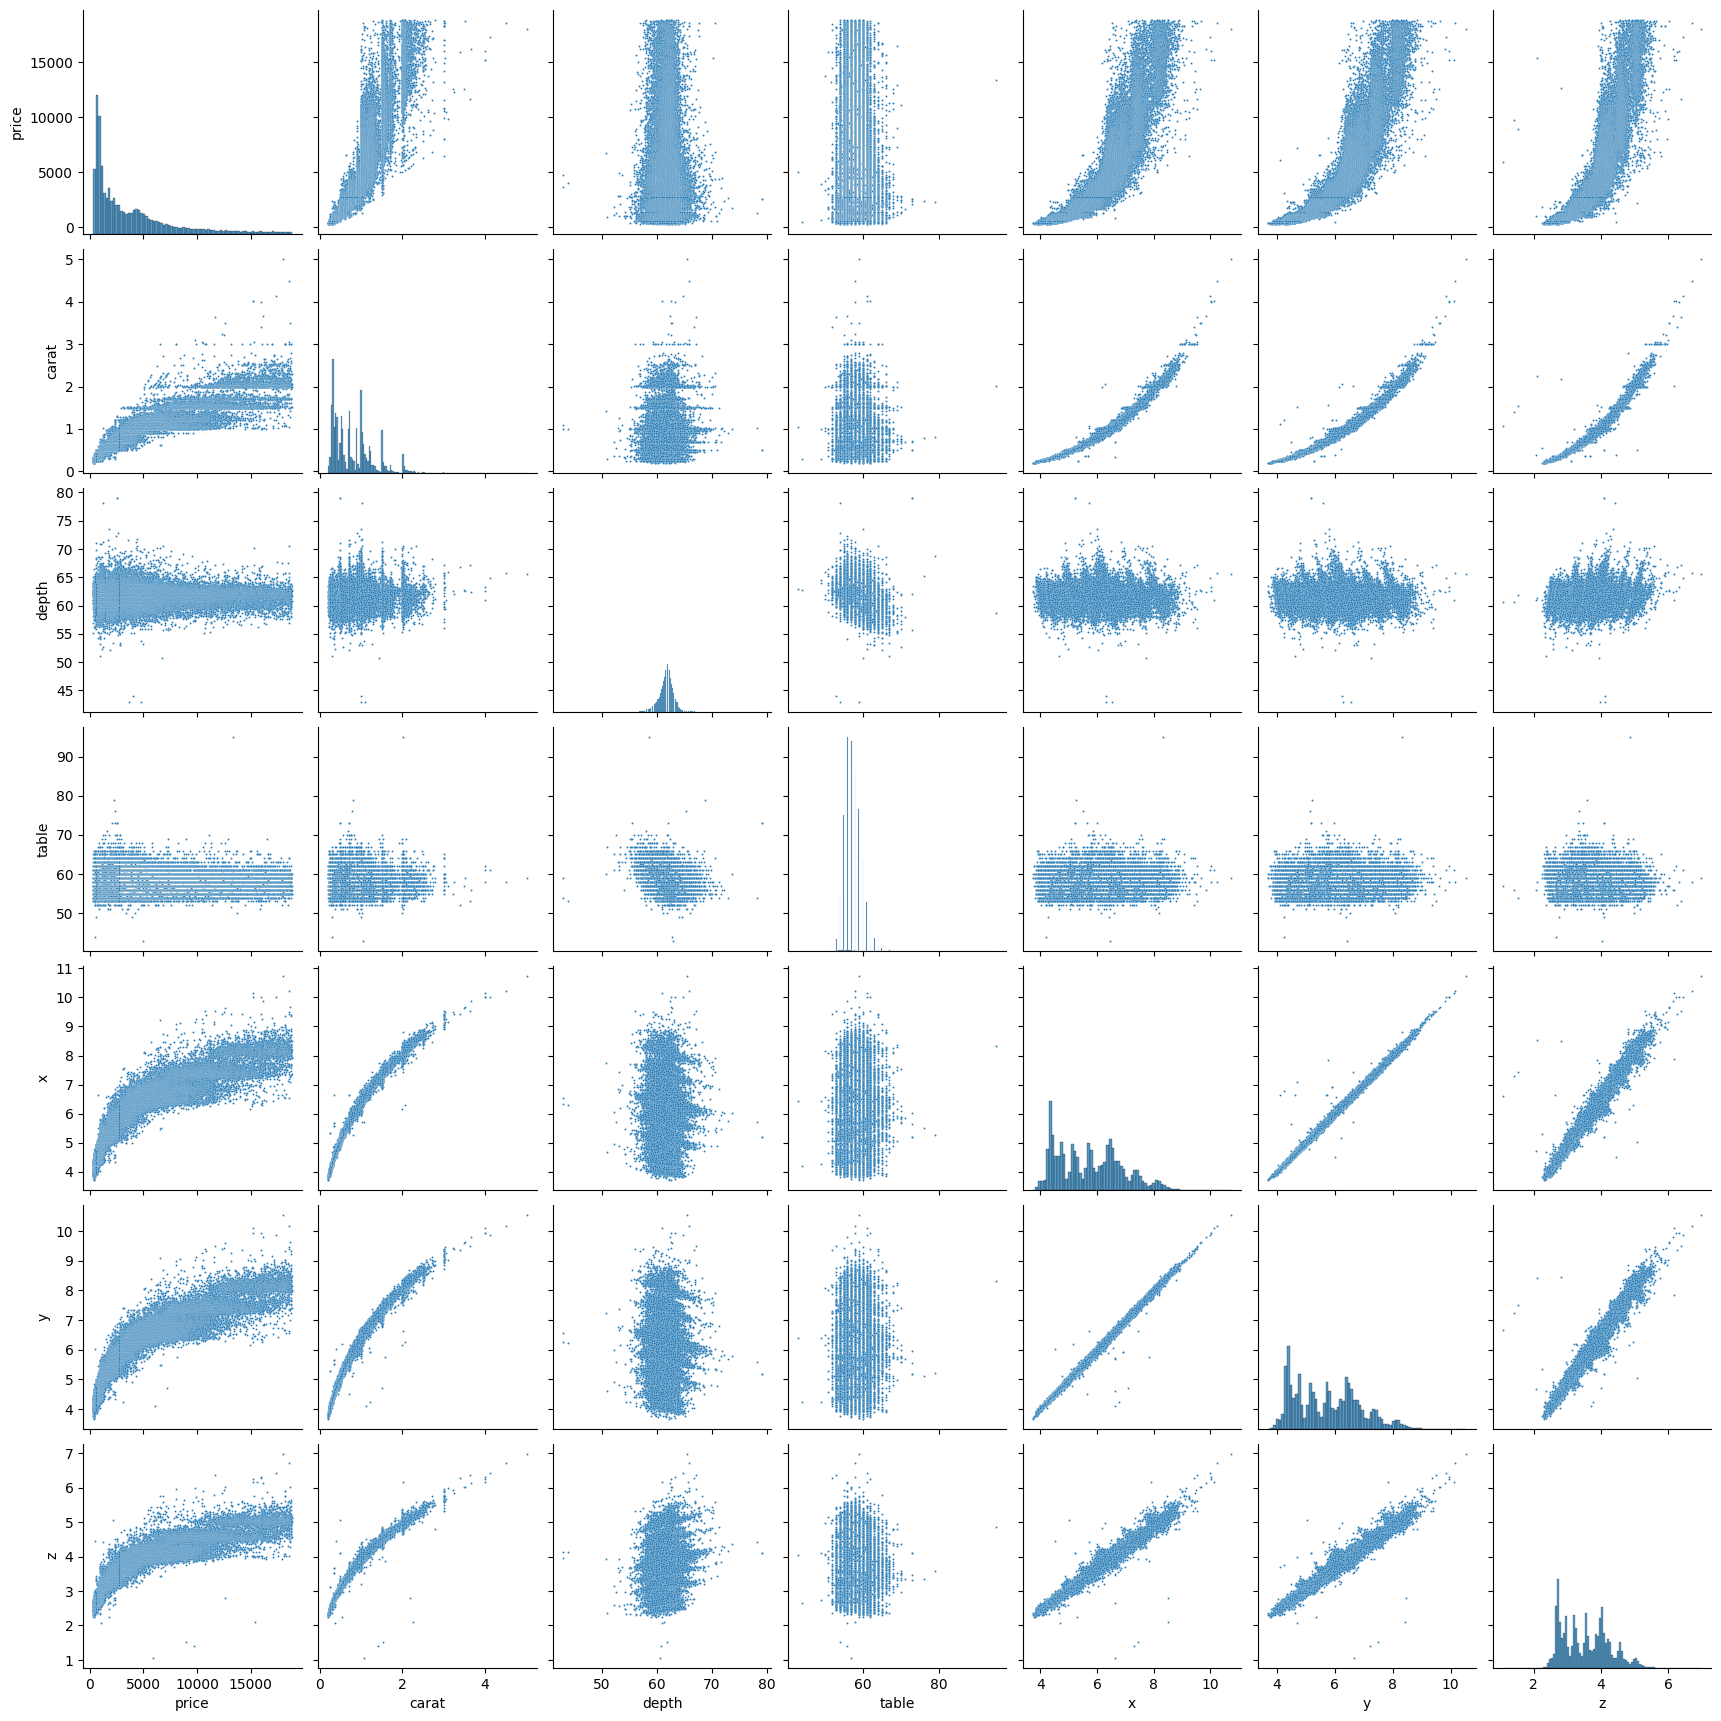

In [18]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2});

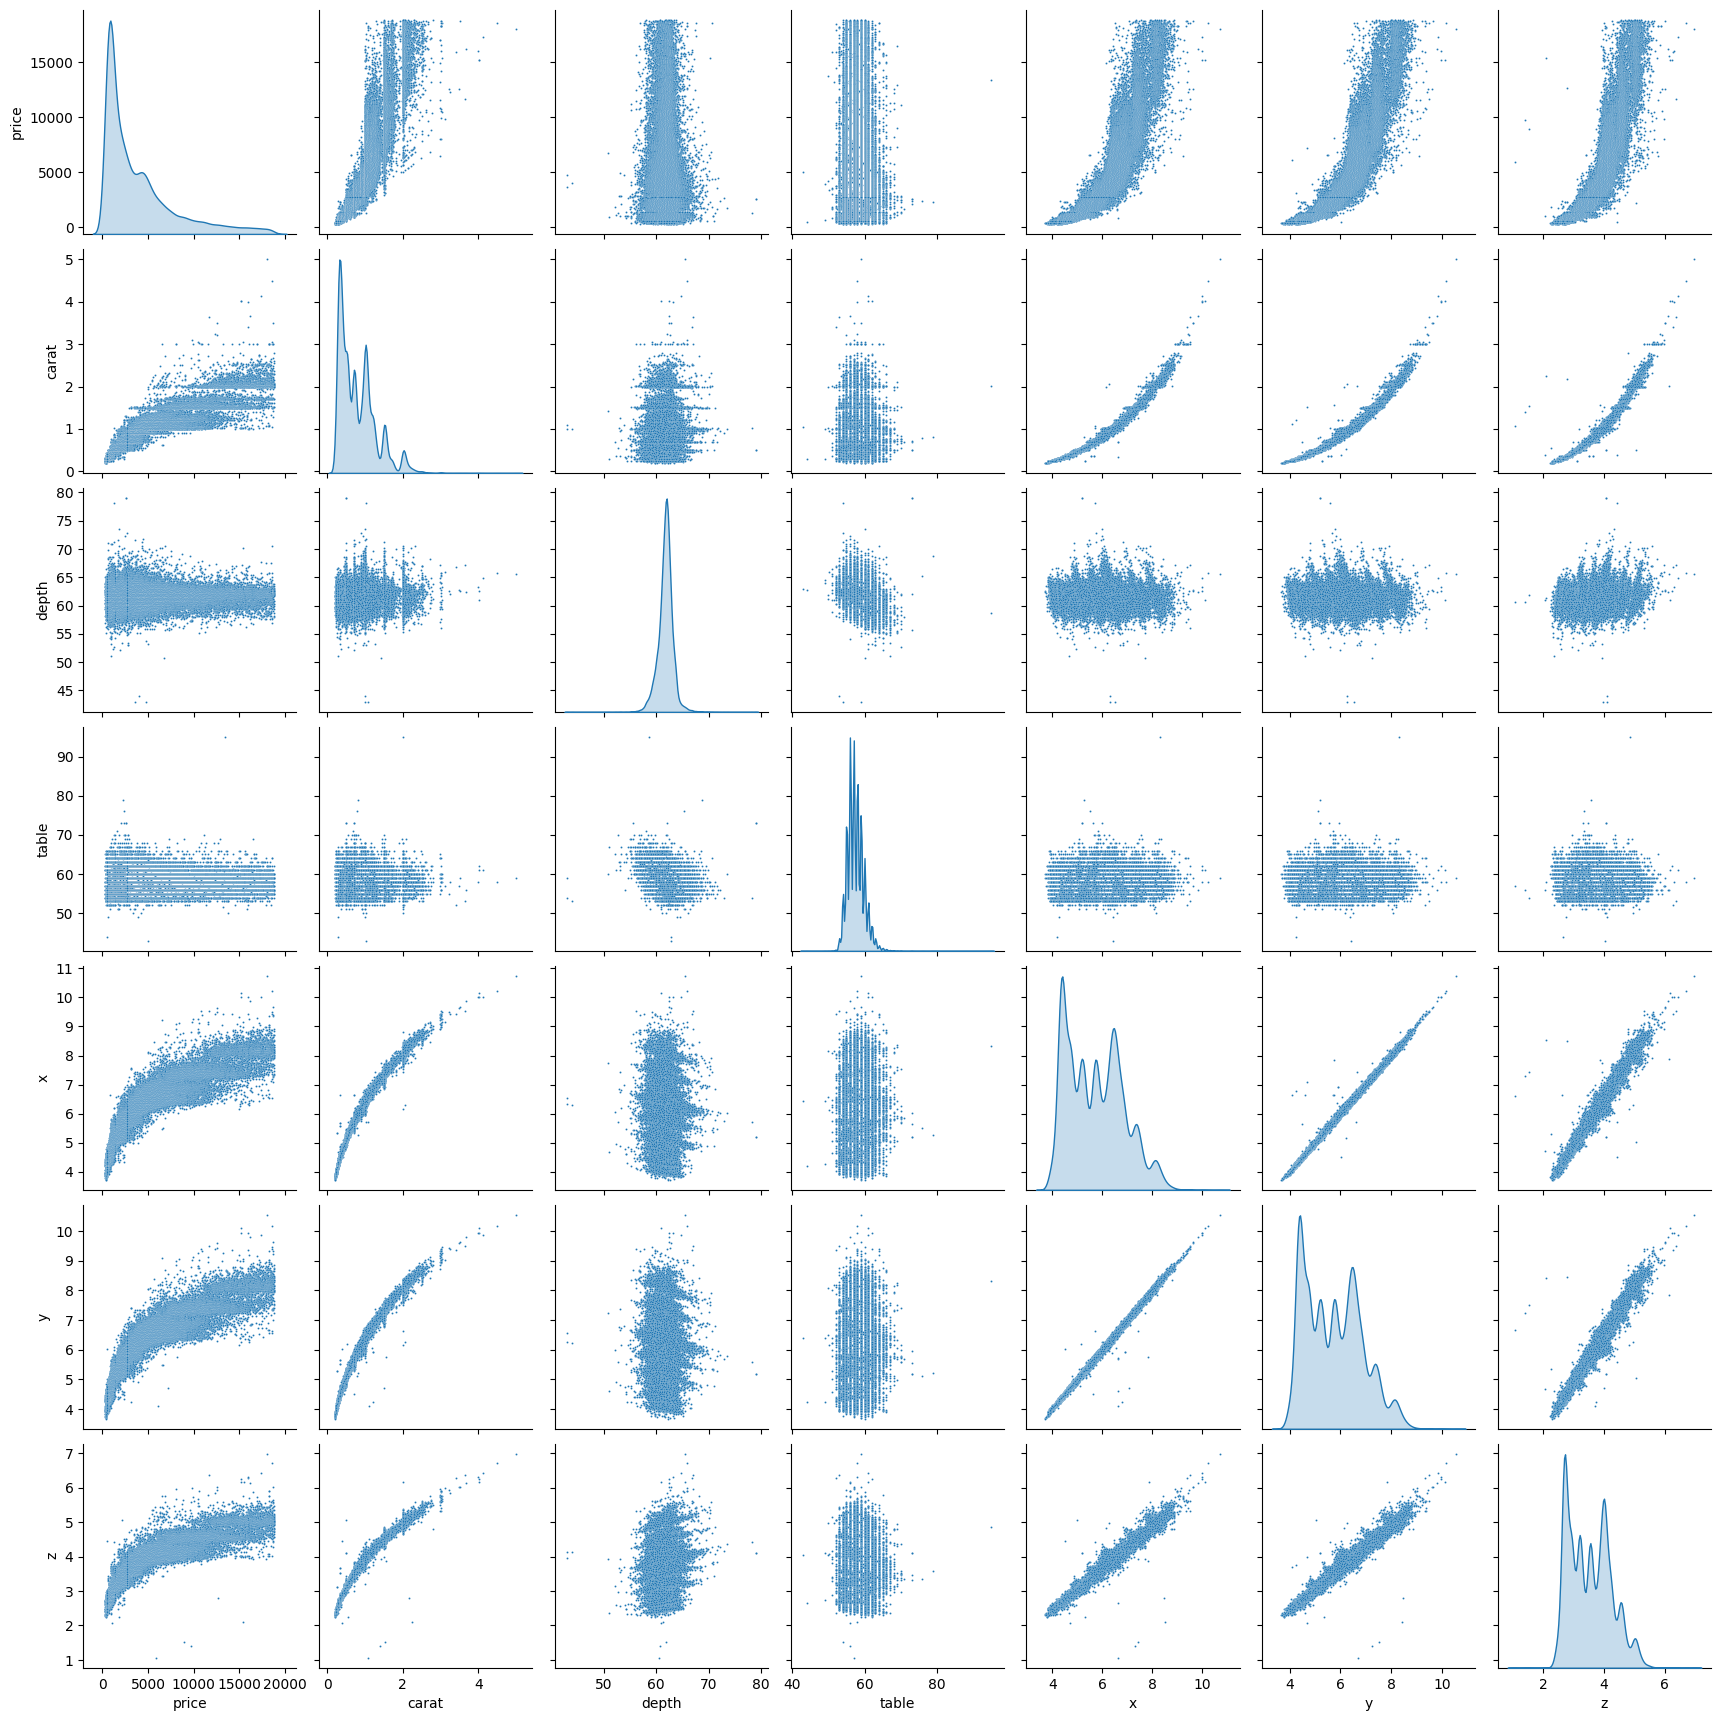

In [19]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2}, diag_kind='kde');

In [20]:
diamonds[numerical_features].corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921603,-0.010595,0.127157,0.887216,0.888810,0.881724
carat,0.921603,1.000000,0.028317,0.181650,0.977761,0.976844,0.976028
depth,-0.010595,0.028317,1.000000,-0.295722,-0.025020,-0.028151,0.096707
table,0.127157,0.181650,-0.295722,1.000000,0.196129,0.189964,0.155849
x,0.887216,0.977761,-0.025020,0.196129,1.000000,0.998652,0.990758
y,0.888810,0.976844,-0.028151,0.189964,0.998652,1.000000,0.990414
z,0.881724,0.976028,0.096707,0.155849,0.990758,0.990414,1.000000


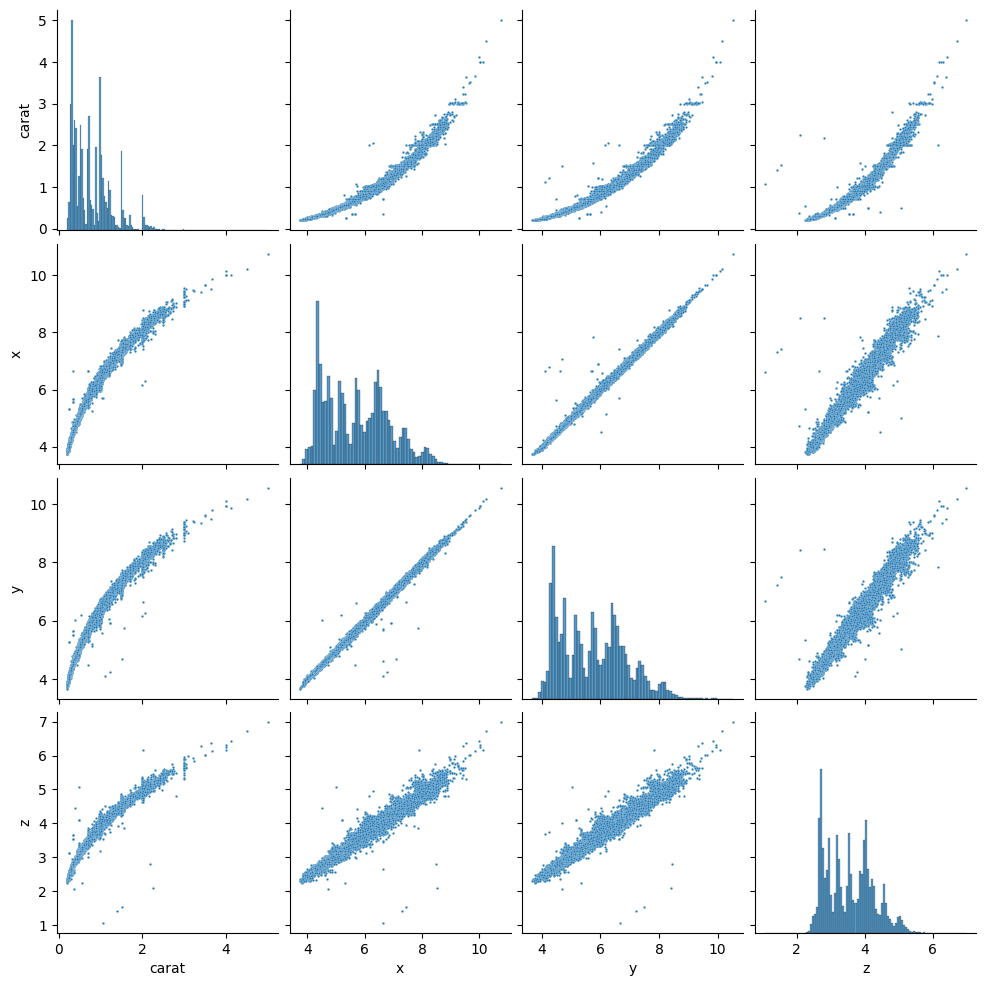

In [21]:
dim_features = diamonds[['carat','x','y','z']]
sns.pairplot(dim_features,plot_kws={"s": 3});

In [22]:
dim_features.corr()

,carat,x,y,z
carat,1.000000,0.977761,0.976844,0.976028
x,0.977761,1.000000,0.998652,0.990758
y,0.976844,0.998652,1.000000,0.990414
z,0.976028,0.990758,0.990414,1.000000


### Two categorical features

In [23]:
pd.crosstab(diamonds['cut'], diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,313,303,175,119
Good,662,933,907,871,702,522,307
Ideal,2834,3902,3826,4883,3115,2093,896
Premium,1602,2337,2331,2924,2358,1428,808
Very Good,1513,2399,2164,2299,1823,1204,678


In [24]:
ct = pd.crosstab(diamonds['cut'], diamonds['color'], margins=True, margins_name='Total')
ct

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,163,224,312,313,303,175,119,1609
Good,662,933,907,871,702,522,307,4904
Ideal,2834,3902,3826,4883,3115,2093,896,21549
Premium,1602,2337,2331,2924,2358,1428,808,13788
Very Good,1513,2399,2164,2299,1823,1204,678,12080
Total,6774,9795,9540,11290,8301,5422,2808,53930


In [25]:
100*ct.div(ct['Total'], axis=0).round(3)

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,10.1,13.9,19.4,19.5,18.8,10.9,7.4,100.0
Good,13.5,19.0,18.5,17.8,14.3,10.6,6.3,100.0
Ideal,13.2,18.1,17.8,22.7,14.5,9.7,4.2,100.0
Premium,11.6,16.9,16.9,21.2,17.1,10.4,5.9,100.0
Very Good,12.5,19.9,17.9,19.0,15.1,10.0,5.6,100.0
Total,12.6,18.2,17.7,20.9,15.4,10.1,5.2,100.0


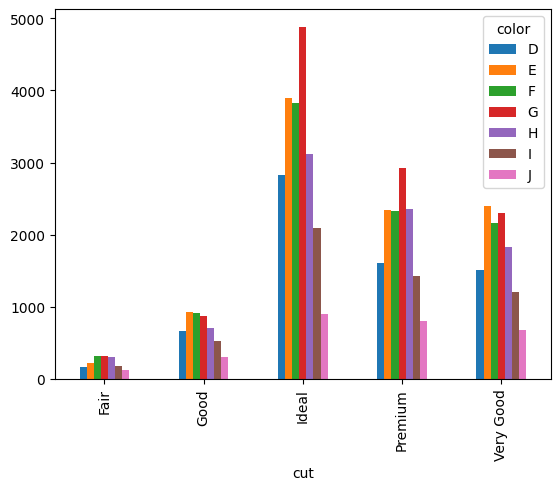

In [26]:
basic_ct = pd.crosstab(diamonds['cut'], diamonds['color'])
basic_ct.plot(kind='bar');

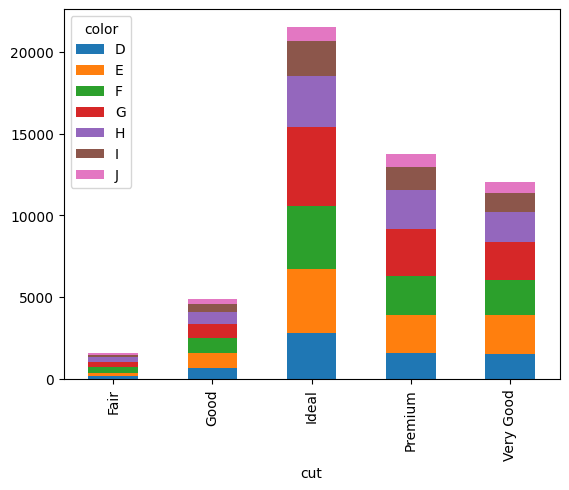

In [27]:
basic_ct.plot(kind='bar', stacked=True);

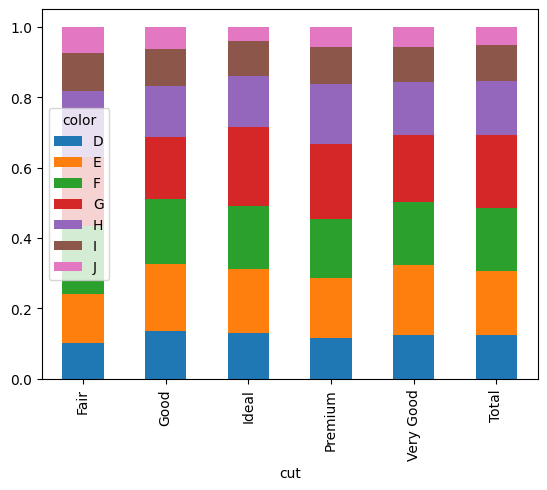

In [28]:
ct.div(ct['Total'], axis=0).iloc[:,:-1].plot(kind='bar', stacked=True);

### A numerical vs. a categorical feature

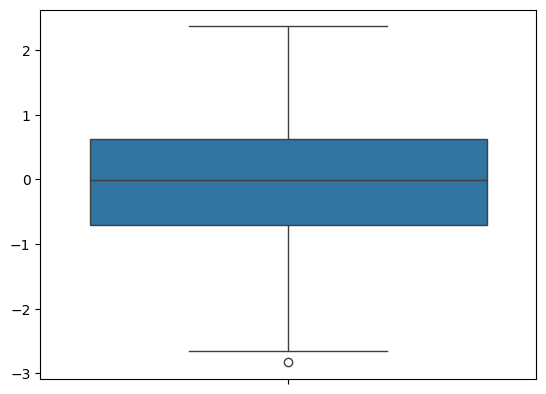

In [29]:
sns.boxplot(r1, orient='v');

In [ ]:
r1[1] = 3.5
r1[2] = 3.7
r1[3] = -3

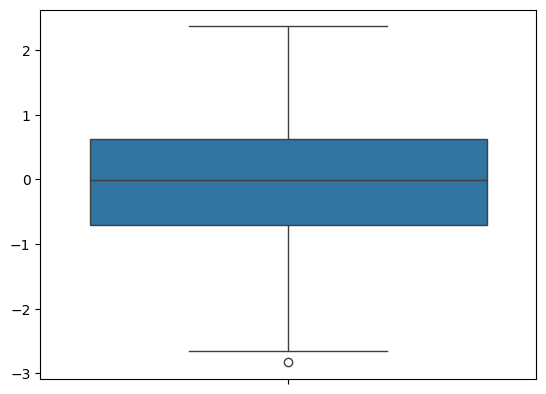

In [30]:
sns.boxplot(r1, orient='v');

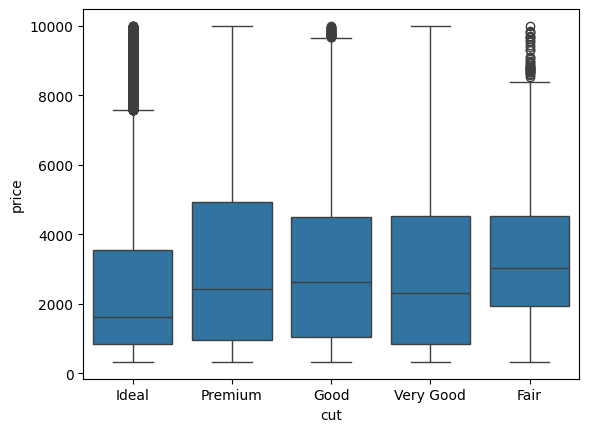

In [31]:
sns.boxplot(x='cut', y='price', data=diamonds.loc[diamonds['price']<10000]);

In [32]:
diamonds.groupby('cut')['price'].agg(np.median).sort_values()

cut
Ideal        1810.0
Very Good    2648.0
Good         3054.0
Premium      3183.0
Fair         3282.0
Name: price, dtype: float64

clarity
IF      1080.0
VVS1    1092.5
VVS2    1311.0
VS1     2005.0
VS2     2053.0
SI1     2822.0
I1      3344.0
SI2     4072.0
Name: price, dtype: float64


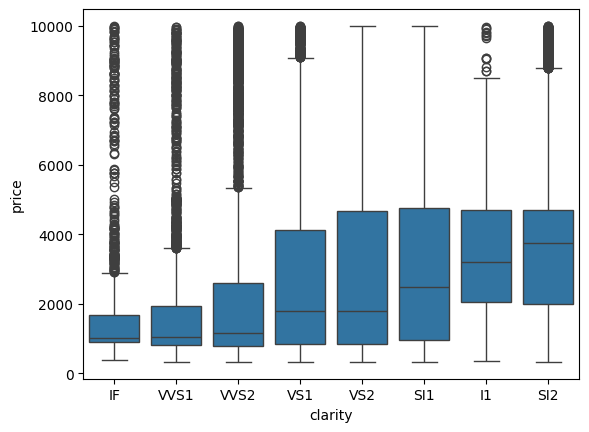

In [33]:
medians_by_clarity = diamonds.groupby('clarity')['price'].agg(np.median).sort_values()
print(medians_by_clarity)
sns.boxplot(x='clarity', y='price', data=diamonds.loc[diamonds['price']<10000],
            order=medians_by_clarity.index);